In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None, names=['parents','has_nurs','form','children','housing','finance','social','health','application'])

df = df.replace('more', np.nan)
df = df.replace(' ?', np.nan)
df.dropna(inplace=True)
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,application
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [3]:
print(df.application.value_counts())
df = df.replace('very_recom', 'recommend')
print(df.application.value_counts())

application
priority      3282
not_recom     3240
spec_prior    2908
very_recom     288
recommend        2
Name: count, dtype: int64
application
priority      3282
not_recom     3240
spec_prior    2908
recommend      290
Name: count, dtype: int64


In [4]:
# perform label encoding on the categorical features
ohe = OneHotEncoder()
le = LabelEncoder()
df.application = le.fit_transform(df.application)
df = pd.get_dummies(df, columns = ['parents','has_nurs','form','housing','finance','social','health'])
df.head()

,children,application,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,1,2,False,False,True,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,True
1,1,1,False,False,True,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
2,1,0,False,False,True,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
3,1,2,False,False,True,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,True
4,1,1,False,False,True,False,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False


In [5]:
df.shape

(9720, 25)

In [6]:
max_acc = 0
acc_list = []
param_list = []
for i in range(10):
    sample_df = df.sample(frac=0.40, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('application', axis=1), sample_df.application, test_size=0.3, random_state=42, stratify=sample_df.application)
    x_train = StandardScaler().fit_transform(x_train)
    param_grid = {
                'C':[0.2, 0.9, 4, 8, 12],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.5, 0.75, 0.005, 0.0009]
                }

    grid = GridSearchCV(SVC(max_iter=100), param_grid)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred)))

    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)

    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 1
Accuracy: 0.7746358183376179

{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}
Sample 2
Accuracy: 0.6812339331619537

{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 3
Accuracy: 0.8269065981148244

{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}
Sample 4
Accuracy: 0.7420736932305055

{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}
Sample 5
Accuracy: 0.610968294772922

{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}
Sample 6
Accuracy: 0.7934875749785776

{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 7
Accuracy: 0.7900599828620394

{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}
Sample 8
Accuracy: 0.7917737789203085

{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}
Sample 9
Accuracy: 0.7455012853470437

{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 10
Accuracy: 0.7694944301628106



In [7]:
print(acc_list)
print(param_list)

[0.7746358183376179, 0.6812339331619537, 0.8269065981148244, 0.7420736932305055, 0.610968294772922, 0.7934875749785776, 0.7900599828620394, 0.7917737789203085, 0.7455012853470437, 0.7694944301628106]
[{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, {'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}]


In [8]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.774636,"{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': ..."
1,0.681234,"{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel'..."
2,0.826907,"{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': ..."
3,0.742074,"{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel'..."
4,0.610968,"{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel'..."
5,0.793488,"{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel'..."
6,0.79006,"{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': ..."
7,0.791774,"{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel'..."
8,0.745501,"{'C': 0.2, 'degree': 2, 'gamma': 0.5, 'kernel'..."
9,0.769494,"{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': ..."


In [9]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.8269065981148244
{'C': 0.2, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
SVC(C=0.2, degree=2, gamma=1, kernel='poly', max_iter=100)


,children,application,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
6503,1,0,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,True,True,False,False
5905,2,1,False,True,False,False,False,True,False,False,...,False,True,True,False,True,False,False,False,True,False
2906,2,0,False,False,True,True,False,False,False,False,...,True,False,True,False,False,True,False,True,False,False
158,3,0,False,False,True,False,False,False,True,False,...,True,False,False,True,False,False,True,True,False,False
5286,2,1,False,True,False,False,False,True,False,False,...,True,False,False,True,False,False,True,False,False,True


In [10]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('application', axis=1), best_sample_df.application, test_size=0.3, random_state=42, stratify=best_sample_df.application)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [11]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [12]:
print(iterations.shape)
print(acc_list.shape)

(100,)
(100,)


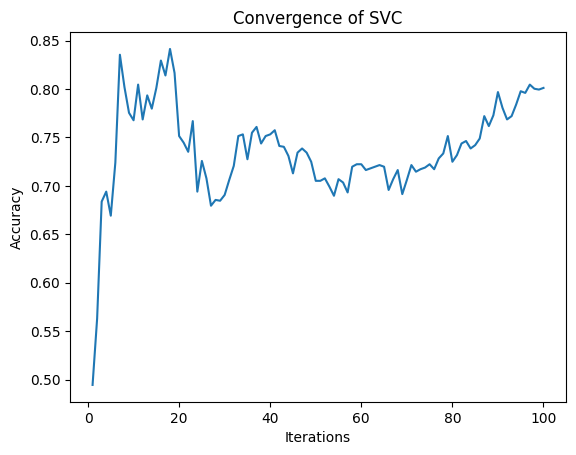

In [13]:
plt.plot(iterations, acc_list)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()